In [42]:
import pandas as pd

In [43]:
#Import cleaned dataset
trips_df = pd.read_parquet('../../data/rides/Taxi_Trips_Sampled_Cleaned.parquet')

In [44]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170749 entries, 0 to 170748
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   taxi_id                 170749 non-null  int64         
 1   trip_start_timestamp    170749 non-null  datetime64[ns]
 2   trip_end_timestamp      170749 non-null  datetime64[ns]
 3   trip_seconds            170749 non-null  float64       
 4   trip_miles              170749 non-null  float64       
 5   pickup_census_tract     170749 non-null  int64         
 6   dropoff_census_tract    170749 non-null  int64         
 7   pickup_community_area   170749 non-null  int64         
 8   dropoff_community_area  170749 non-null  int64         
 9   fare                    170749 non-null  float64       
 10  tips                    170749 non-null  float64       
 11  tolls                   170749 non-null  float64       
 12  Extras                  170749

In [45]:
trips_df.head(5)

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,h3_07_dropoff,h3_08_pickup,h3_08_dropoff,h3_09_pickup,h3_09_dropoff,pickup_centroid,dropoff_centroid,datetime,temp,precip
0,1,2015-01-01 00:00:00,2015-01-01 00:15:00,840.0,2.9,17031241400,17031062800,24,6,9.85,...,872664c12ffffff,882664cac1fffff,882664c129fffff,892664cac03ffff,892664c1293ffff,POINT (-87.675311622 41.906025969),POINT (-87.661265218 41.936159071),2015-01-01,-7.0115,0
1,2,2015-01-01 00:00:00,2015-01-01 00:00:00,480.0,0.9,17031320100,17031081500,32,8,6.25,...,872664c1effffff,882664c1e3fffff,882664c1e1fffff,892664c1e2fffff,892664c1e0fffff,POINT (-87.620992913 41.884987192),POINT (-87.626214906 41.892507781),2015-01-01,-7.0115,0
2,3,2015-01-01 00:00:00,2015-01-01 00:15:00,600.0,2.4,17031071500,17031070700,7,7,8.85,...,872664c12ffffff,882664c115fffff,882664c121fffff,892664c114fffff,892664c1257ffff,POINT (-87.631717366 41.914616286),POINT (-87.673807238 41.929272532),2015-01-01,-7.0115,0
3,4,2015-01-01 00:15:00,2015-01-01 00:15:00,377.0,1.4,17031081700,17031281900,8,28,6.45,...,872664c1affffff,882664c1e7fffff,882664c1adfffff,892664c1e73ffff,892664c1acfffff,POINT (-87.63186395 41.892042136),POINT (-87.642648998 41.879255084),2015-01-01,-7.0115,0
4,5,2015-01-01 00:15:00,2015-01-01 00:30:00,480.0,1.4,17031080300,17031081700,8,8,6.65,...,872664c1effffff,882664c13bfffff,882664c1e7fffff,892664c13afffff,892664c1e73ffff,POINT (-87.63576009 41.90749193),POINT (-87.63186395 41.892042136),2015-01-01,-7.0115,0


In [48]:
from sklearn.preprocessing import LabelEncoder
trips_with_payment_df = trips_df.copy()
label_encoder = LabelEncoder()
trips_with_payment_df['payment_type_encoded'] = label_encoder.fit_transform(trips_with_payment_df['payment_type'])
trips_df = trips_with_payment_df

/Users/friedemannant/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/friedemannant/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/friedemannant/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/friedemannant/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

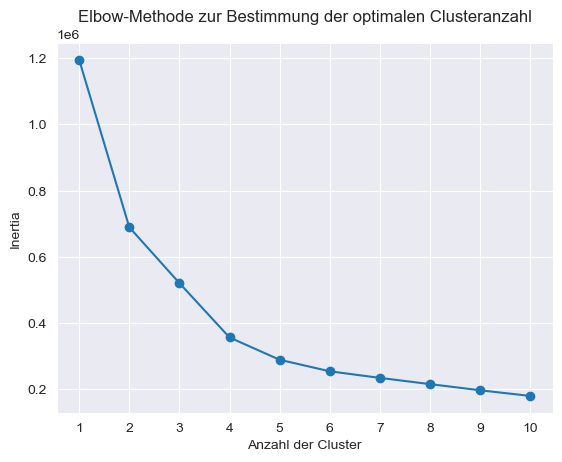

In [60]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

numerical_columns = ['trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'Extras', 'payment_type_encoded']

scaler = StandardScaler()
trips_df[numerical_columns] = scaler.fit_transform(trips_df[numerical_columns])

k_max = 10

clusters = []
losses = []

for k in range(1, k_max + 1):
    model = KMeans(n_clusters=k, random_state=4711)
    model.fit(trips_df[numerical_columns])
    clusters.append(k)
    losses.append(model.inertia_)

plt.plot(clusters, losses, marker='o')
plt.title('Elbow-Methode zur Bestimmung der optimalen Clusteranzahl')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.xticks(clusters)
plt.show()


/Users/friedemannant/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


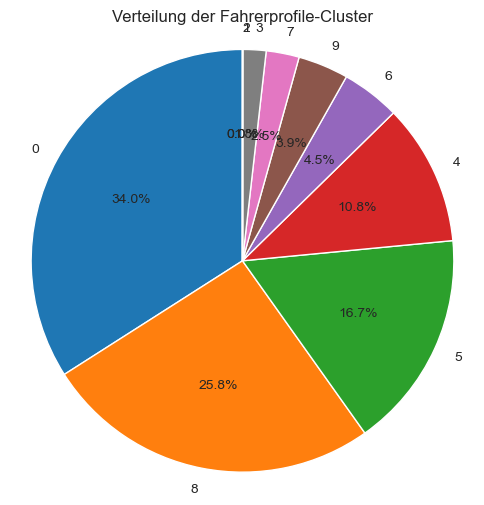

0    58115
8    44049
5    28501
4    18461
6     7658
9     6596
7     4307
3     3038
1       23
2        1
Name: driver_profile_cluster, dtype: int64


In [70]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
trips_df[numerical_columns] = scaler.fit_transform(trips_df[numerical_columns])

num_clusters = 10;

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
trips_df['driver_profile_cluster'] = kmeans.fit_predict(trips_df[numerical_columns])

cluster_counts = trips_df['driver_profile_cluster'].value_counts()
cluster_percentages = (cluster_counts / len(trips_df)) * 100

plt.figure(figsize=(6, 6))
plt.pie(cluster_percentages, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Verteilung der Fahrerprofile-Cluster')
plt.axis('equal')
plt.show()

print(cluster_counts)


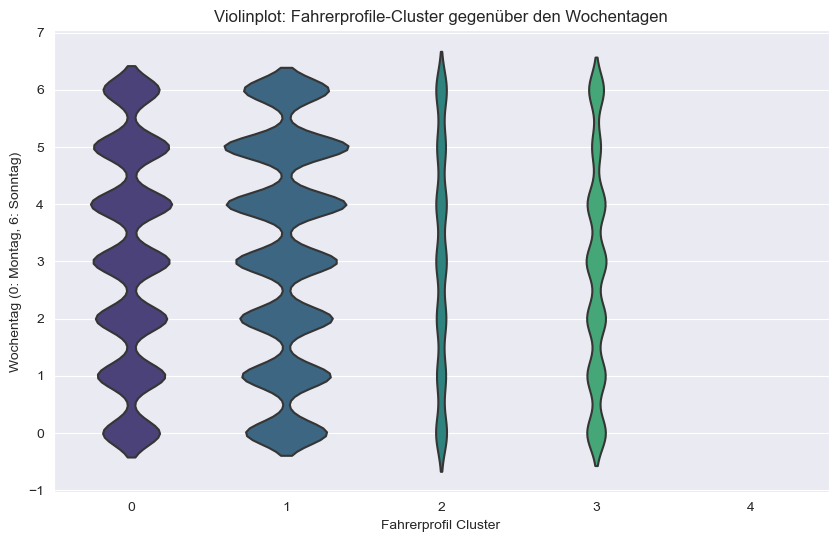

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lade die Daten und führe die Clusteranalyse durch
# Hier gehe ich davon aus, dass die Clusteranalyse bereits durchgeführt wurde und die Spalte 'driver_profile_cluster' im DataFrame vorhanden ist.

# Erstelle einen neuen DataFrame mit den benötigten Spalten für den Violinplot
violin_df = trips_df[['driver_profile_cluster', 'dayofweek_start']]

# Erstelle den Violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(data=violin_df, x='driver_profile_cluster', y='dayofweek_start', inner=None, scale='count', palette='viridis')
plt.xlabel('Fahrerprofil Cluster')
plt.ylabel('Wochentag (0: Montag, 6: Sonntag)')
plt.title('Violinplot: Fahrerprofile-Cluster gegenüber den Wochentagen')
plt.show()



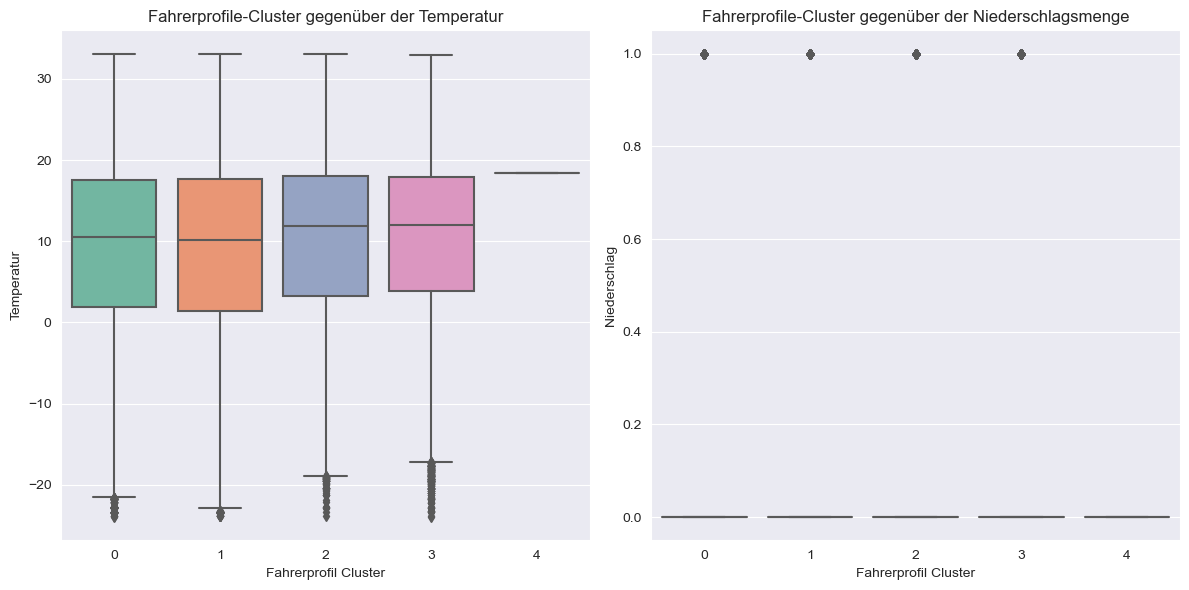

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lade die Daten und führe die Clusteranalyse durch
# Hier gehe ich davon aus, dass die Clusteranalyse bereits durchgeführt wurde und die Spalte 'driver_profile_cluster' im DataFrame vorhanden ist.

# Erstelle einen neuen DataFrame mit den benötigten Spalten für die Boxplots
boxplot_df = trips_df[['driver_profile_cluster', 'temp', 'precip']]

# Erstelle die Boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=boxplot_df, x='driver_profile_cluster', y='temp', palette='Set2')
plt.xlabel('Fahrerprofil Cluster')
plt.ylabel('Temperatur')
plt.title('Fahrerprofile-Cluster gegenüber der Temperatur')

plt.subplot(1, 2, 2)
sns.boxplot(data=boxplot_df, x='driver_profile_cluster', y='precip', palette='Set2')
plt.xlabel('Fahrerprofil Cluster')
plt.ylabel('Niederschlag')
plt.title('Fahrerprofile-Cluster gegenüber der Niederschlagsmenge')

plt.tight_layout()
plt.show()


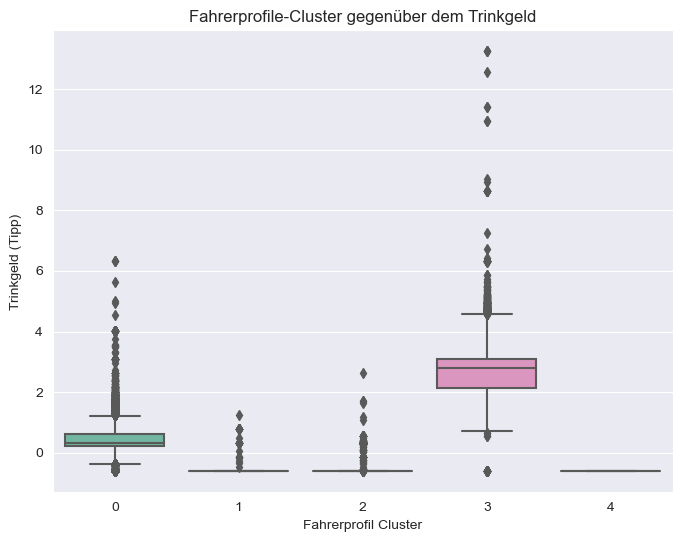

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lade die Daten und führe die Clusteranalyse durch
# Hier gehe ich davon aus, dass die Clusteranalyse bereits durchgeführt wurde und die Spalte 'driver_profile_cluster' im DataFrame vorhanden ist.

# Erstelle einen neuen DataFrame mit den benötigten Spalten für den Boxplot
boxplot_df = trips_df[['driver_profile_cluster', 'tips']]

# Erstelle den Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=boxplot_df, x='driver_profile_cluster', y='tips', palette='Set2')
plt.xlabel('Fahrerprofil Cluster')
plt.ylabel('Trinkgeld (Tipp)')
plt.title('Fahrerprofile-Cluster gegenüber dem Trinkgeld')
plt.show()


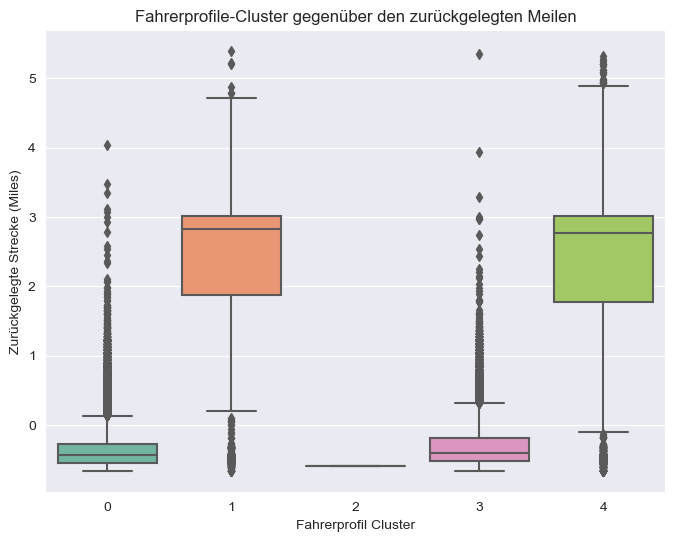

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lade die Daten und führe die Clusteranalyse durch
# Hier gehe ich davon aus, dass die Clusteranalyse bereits durchgeführt wurde und die Spalte 'driver_profile_cluster' im DataFrame vorhanden ist.

# Erstelle einen neuen DataFrame mit den benötigten Spalten für den Boxplot
boxplot_df = trips_df[['driver_profile_cluster', 'trip_miles']]

# Erstelle den Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=boxplot_df, x='driver_profile_cluster', y='trip_miles', palette='Set2')
plt.xlabel('Fahrerprofil Cluster')
plt.ylabel('Zurückgelegte Strecke (Miles)')
plt.title('Fahrerprofile-Cluster gegenüber den zurückgelegten Meilen')
plt.show()


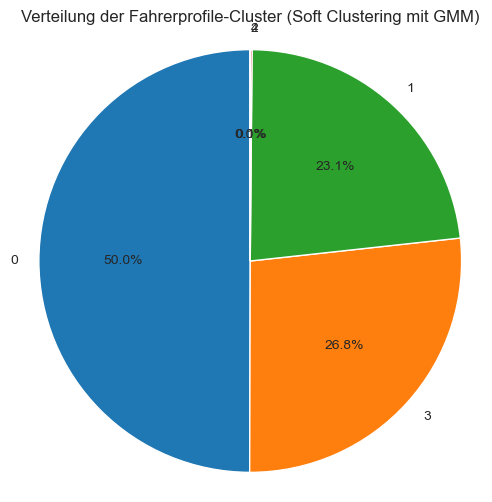

In [66]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


trips_df[numerical_columns] = scaler.fit_transform(trips_df[numerical_columns])

scaler = StandardScaler()
trips_df[numerical_columns] = scaler.fit_transform(trips_df[numerical_columns])

num_clusters = 5

gmm = GaussianMixture(n_components=num_clusters, random_state=42)
trips_df['driver_profile_cluster_soft'] = gmm.fit_predict(trips_df[numerical_columns])

cluster_counts = trips_df['driver_profile_cluster_soft'].value_counts()
cluster_percentages = (cluster_counts / len(trips_df)) * 100

plt.figure(figsize=(6, 6))
plt.pie(cluster_percentages, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Verteilung der Fahrerprofile-Cluster (Soft Clustering mit GMM)')
plt.axis('equal')
plt.show()
